In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style('ticks')
#import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline


df=pd.read_csv('Skyserver_SQL8_14_2019 7_03_48 PM.csv',sep='delimiter')



/home/alefe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [39]:
df.head()

,#Table1
0,"objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,..."
1,"1237651752944468112,198.016009992392,1.6455654..."
2,"1237651752944468174,198.084878534568,1.6691174..."
3,"1237651752944533683,198.155161139549,1.7184612..."
4,"1237651752944599225,198.319787879177,1.5996410..."


In [40]:
df=df['#Table1'].str.split(',',expand=True)

In [41]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
1,1237651752944468112,198.016009992392,1.64556542809982,16.90902,15.53707,14.91802,14.59094,14.36928,1462,301,2,485,591132124212389888,GALAXY,0.0290172,525,52295,126
2,1237651752944468174,198.084878534568,1.66911743022939,19.29113,17.4465,16.49109,16.09714,15.80416,1462,301,2,485,591131849334482944,GALAXY,0.09954652,525,52295,125
3,1237651752944533683,198.155161139549,1.71846122472277,19.50868,17.56078,16.5514,16.09785,15.72975,1462,301,2,486,591143669084481536,GALAXY,0.1104257,525,52295,168
4,1237651752944599225,198.319787879177,1.59964107107539,19.07044,18.10373,17.8184,17.55227,17.47413,1462,301,2,487,591123328119367680,GALAXY,0.09828539,525,52295,94


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 18 columns):
0     10001 non-null object
1     10001 non-null object
2     10001 non-null object
3     10001 non-null object
4     10001 non-null object
5     10001 non-null object
6     10001 non-null object
7     10001 non-null object
8     10001 non-null object
9     10001 non-null object
10    10001 non-null object
11    10001 non-null object
12    10001 non-null object
13    10001 non-null object
14    10001 non-null object
15    10001 non-null object
16    10001 non-null object
17    10001 non-null object
dtypes: object(18)
memory usage: 1.4+ MB


In [43]:
cols=df.iloc[:1].values

In [44]:
cols

array([['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun',
        'camcol', 'field', 'specobjid', 'class', 'redshift', 'plate',
        'mjd', 'fiberid']], dtype=object)

In [45]:
col=cols[0]

In [46]:
df.columns=col
df.drop(df.index[[0]],inplace=True)

In [47]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
1,1237651752944468112,198.016009992392,1.64556542809982,16.90902,15.53707,14.91802,14.59094,14.36928,1462,301,2,485,591132124212389888,GALAXY,0.0290172,525,52295,126
2,1237651752944468174,198.084878534568,1.66911743022939,19.29113,17.4465,16.49109,16.09714,15.80416,1462,301,2,485,591131849334482944,GALAXY,0.09954652,525,52295,125
3,1237651752944533683,198.155161139549,1.71846122472277,19.50868,17.56078,16.5514,16.09785,15.72975,1462,301,2,486,591143669084481536,GALAXY,0.1104257,525,52295,168
4,1237651752944599225,198.319787879177,1.59964107107539,19.07044,18.10373,17.8184,17.55227,17.47413,1462,301,2,487,591123328119367680,GALAXY,0.09828539,525,52295,94
5,1237651752944664737,198.401975307351,1.78749241129254,19.31644,17.81097,16.94424,16.46422,16.13091,1462,301,2,488,591138446404249600,GALAXY,0.1125803,525,52295,149


In [48]:
df.drop(['objid','run','rerun','camcol','field','specobjid','plate','mjd','fiberid'],axis=1,inplace=True)

In [49]:
df.head()

,ra,dec,u,g,r,i,z,class,redshift
1,198.016009992392,1.64556542809982,16.90902,15.53707,14.91802,14.59094,14.36928,GALAXY,0.0290172
2,198.084878534568,1.66911743022939,19.29113,17.4465,16.49109,16.09714,15.80416,GALAXY,0.09954652
3,198.155161139549,1.71846122472277,19.50868,17.56078,16.5514,16.09785,15.72975,GALAXY,0.1104257
4,198.319787879177,1.59964107107539,19.07044,18.10373,17.8184,17.55227,17.47413,GALAXY,0.09828539
5,198.401975307351,1.78749241129254,19.31644,17.81097,16.94424,16.46422,16.13091,GALAXY,0.1125803


In [50]:
df['ra']=df.ra.astype(float)
df['dec']=df.dec.astype(float)
df['u']=df.u.astype(float)
df['g']=df.g.astype(float)
df['r']=df.r.astype(float)
df['i']=df.i.astype(float)
df['z']=df.z.astype(float)
df['redshift']=df.redshift.astype(float)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 9 columns):
ra          10000 non-null float64
dec         10000 non-null float64
u           10000 non-null float64
g           10000 non-null float64
r           10000 non-null float64
i           10000 non-null float64
z           10000 non-null float64
class       10000 non-null object
redshift    10000 non-null float64
dtypes: float64(8), object(1)
memory usage: 781.2+ KB


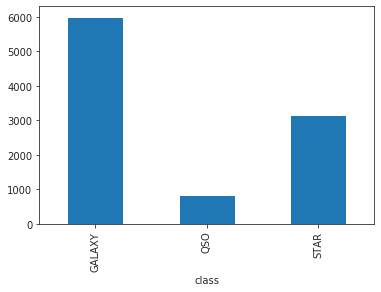

In [52]:
df.groupby(['class'])['class'].count().plot(kind='bar')

Text(0.5, 1.0, 'Galaxy')

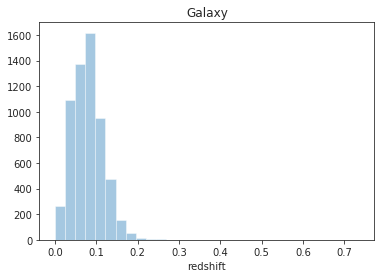

In [53]:
sns.distplot(df[df['class']=='GALAXY'].redshift, bins = 30, kde = False).set_title('Galaxy')

Text(0.5, 1.0, 'Star')

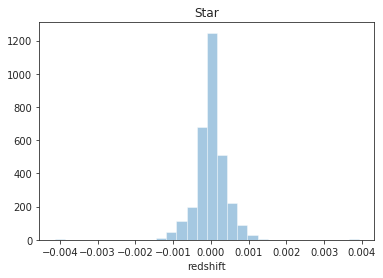

In [54]:
sns.distplot(df[df['class']=='STAR'].redshift, bins = 30, kde = False).set_title('Star')

Text(0.5, 1.0, 'Quasar')

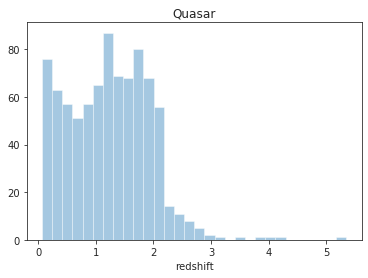

In [55]:
sns.distplot(df[df['class']=='QSO'].redshift, bins = 30, kde = False).set_title('Quasar')

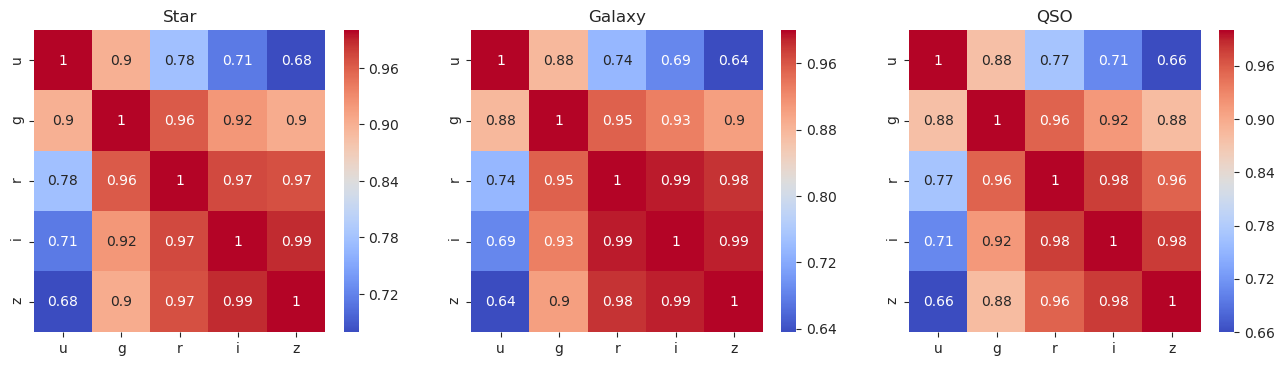

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(df[df['class']=='STAR'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[0],annot=True ,cmap='coolwarm')
ax.set_title('Star')
ax = sns.heatmap(df[df['class']=='GALAXY'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[1],annot=True, cmap='coolwarm')
ax.set_title('Galaxy')
ax = sns.heatmap(df[df['class']=='QSO'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[2],annot=True, cmap='coolwarm')
ax = ax.set_title('QSO')

Essas matrizes de correlaçao estao dizendo que a forma de medir galáxias, estrelas ou quasares é igual para estes objetos. Nao existe nenhuma preferência por nenhum objeto.

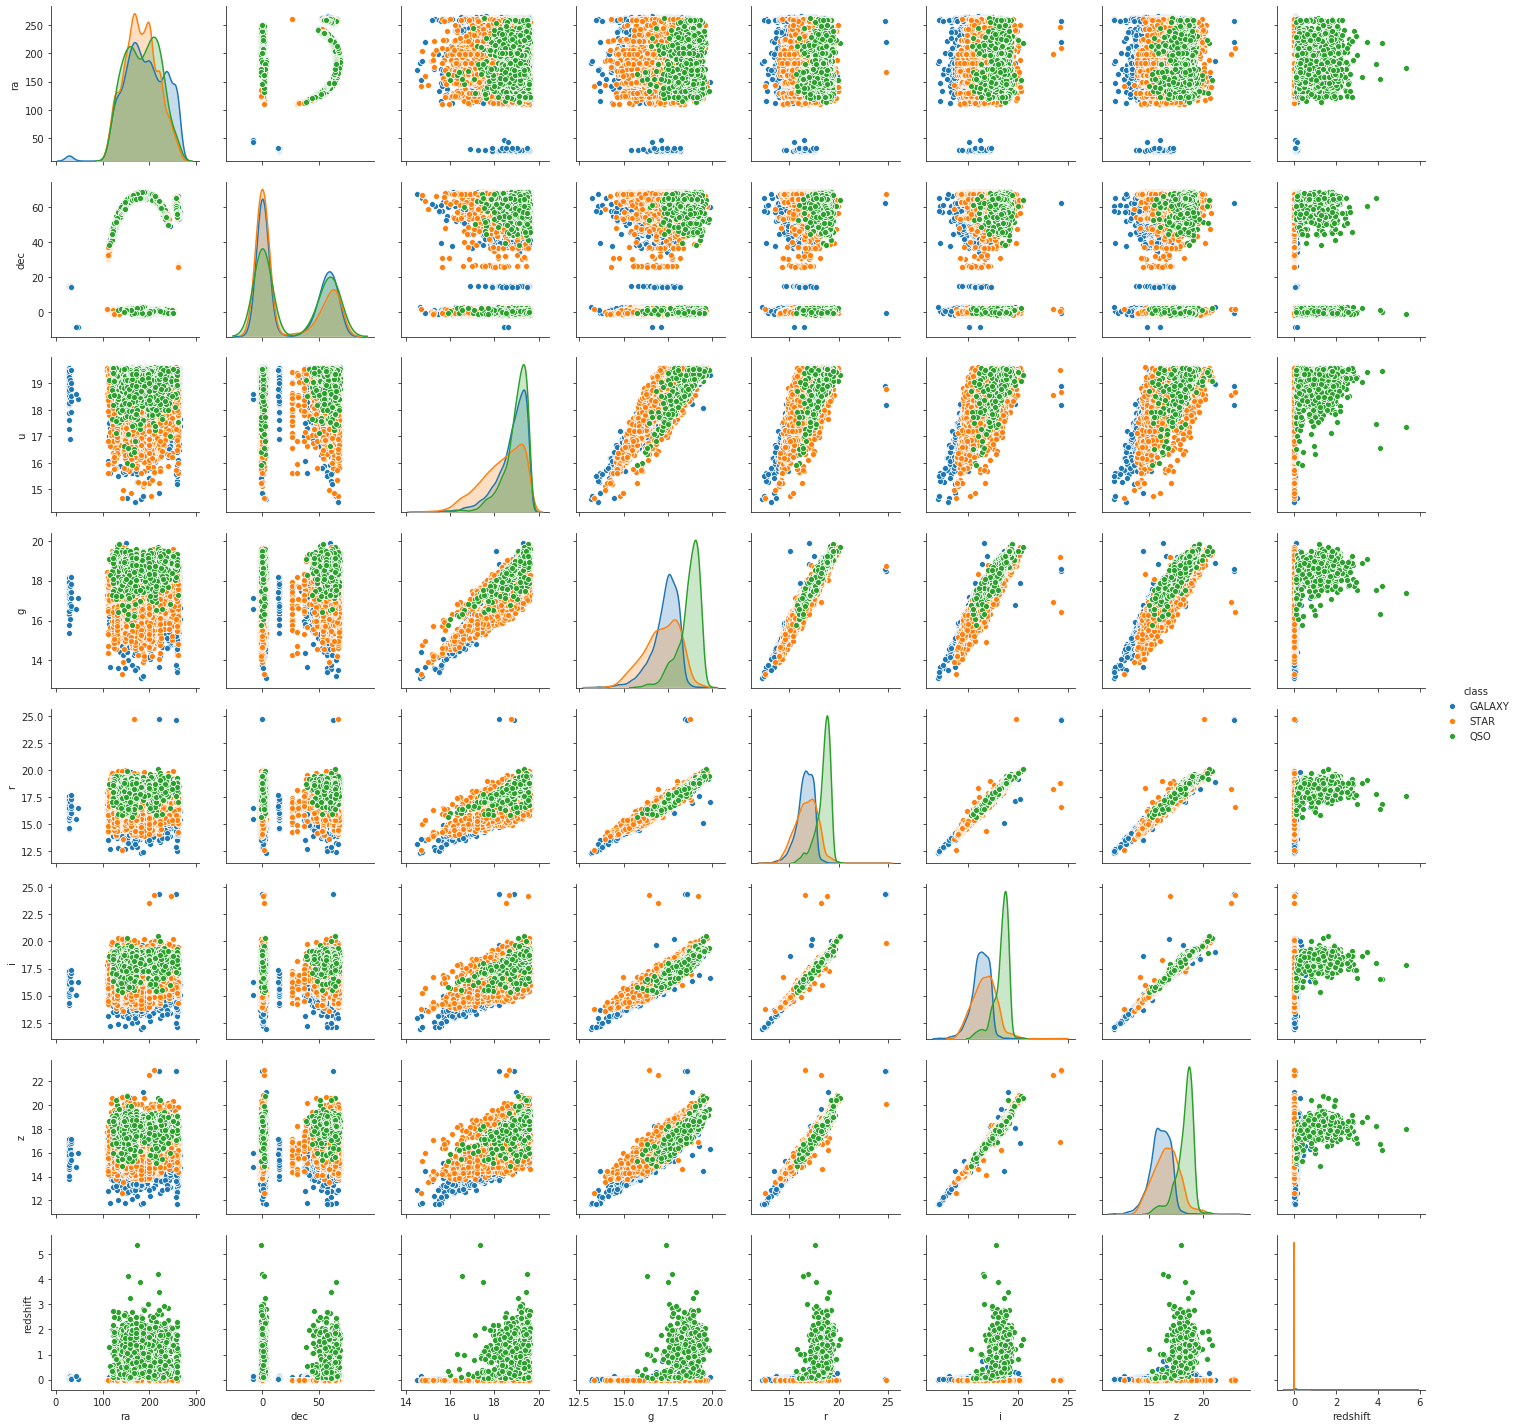

In [57]:
sns.pairplot(df, hue="class")

In [58]:
scaler = MinMaxScaler()
sdss = scaler.fit_transform(df.drop('class', axis=1))
X_train, X_test, y_train, y_test = train_test_split(sdss, df['class'], test_size=0.33)

# KNN Classifier

In [59]:
knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = knn.predict(X_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 86.09
Time consumed for training: 0.016 seconds
Time consumed for prediction: 0.13267 seconds


# Naive Bayes

In [62]:
from sklearn.preprocessing import MaxAbsScaler
scaler_gnb = MaxAbsScaler()
sdss = scaler_gnb.fit_transform(df.drop('class', axis=1))
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(sdss, df['class'], test_size=0.33)

gnb = GaussianNB()
training_start = time.perf_counter()
gnb.fit(X_train_gnb, y_train_gnb)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = gnb.predict(X_test_gnb)
prediction_end = time.perf_counter()
acc_gnb = (preds == y_test_gnb).sum().astype(float) / len(preds)*100
gnb_train_time = training_end-training_start
gnb_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnb))
print("Time consumed for training: %4.3f seconds" % (gnb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gnb_prediction_time))

Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: 98.12
Time consumed for training: 0.025 seconds
Time consumed for prediction: 0.00576 seconds


# XGBoost

In [63]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 99.21
Time consumed for training: 1.176
Time consumed for prediction: 0.02083 seconds


# Random Forest

In [64]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 98.97
Time consumed for training: 0.114 seconds
Time consumed for prediction: 0.00377 seconds


# Support Vector Machine (SVM)

In [65]:
svc = SVC()
training_start = time.perf_counter()
svc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = svc.predict(X_test)
prediction_end = time.perf_counter()
acc_svc = (preds == y_test).sum().astype(float) / len(preds)*100
svc_train_time = training_end-training_start
svc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))
print("Time consumed for training: %4.3f seconds" % (svc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (svc_prediction_time))

/home/alefe/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 79.85
Time consumed for training: 1.190 seconds
Time consumed for prediction: 0.43208 seconds


In [66]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df


,Score,Runtime Training,Runtime Prediction
Model,,,
XGBoost,99.212121,1.175879,0.020833
Random Forest,98.969697,0.113647,0.003765
Naive Bayes,98.121212,0.025385,0.005764
KNN,86.090909,0.015867,0.132674
SVC,79.848485,1.189690,0.432076


# k- fold Cross-Validation

Random Forest

In [71]:
from sklearn.model_selection import cross_val_score
rfc_cv = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rfc_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.99403875 0.99254844 0.98956781 0.9880597  0.98656716 0.98507463
 0.99104478 0.98507463 0.99103139 0.99251497]
Mean: 0.9895522248265232
Standard Deviation: 0.003058363768069497


XGBoost

In [72]:
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.99403875 0.99403875 0.98956781 0.9880597  0.98656716 0.98955224
 0.98955224 0.98656716 0.99252616 0.99101796]
Mean: 0.9901487935494142
Standard Deviation: 0.0026027015972050573


# Feature importances

In [74]:
importances = pd.DataFrame({
    'Feature': df.drop('class', axis=1).columns,
    'Importance': xgb.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

,Importance
Feature,
redshift,0.871589
r,0.034925
u,0.022815
g,0.017432
i,0.017307
z,0.016636
ra,0.013499
dec,0.005798


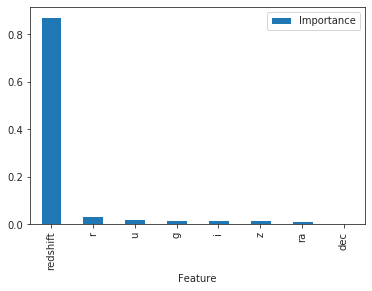

In [75]:
importances.plot.bar()